## 10.1 注意力提示

### 10.1.1 生物学中的注意力提示

受试者基于非自主性提示和自主性提示有选择地引导注意力的焦点。原书举了个例子，也就是红色的咖啡杯一般是最引起注意的，但是喝了咖啡之后会将注意力转移到看书上。

### 10.1.2 查询、键和值

下面的这张图定义了查询、键和值。

![](../images/10-1-3.svg)

### 10.1.3 注意力的可视化

In [1]:
import torch
from d2l import torch as d2l

定义一个`show_heatmaps`函数，来进行展示，其中`matrices`的形状是（要显示的行数，要显示的列数，查询的数目，键的数目）

In [2]:
#@save
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5),
                  cmap='Reds'):
    """显示矩阵热图"""
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6);

下面是一个例子，仅当查询和键相同时，注意力权重为1，否则为0.

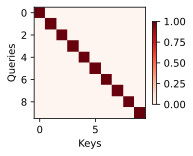

In [3]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

### 10.1.4 小结

- 人类的注意力是有限的、有价值和稀缺的资源。
- 受试者使用非自主性和自主性提示有选择性地引导注意力。前者基于突出性，后者则依赖于意识。
- 注意力机制与全连接层或者汇聚层的区别源于增加的自主提示。
- 由于包含了自主性提示，注意力机制与全连接的层或汇聚层不同。
- 注意力机制通过注意力汇聚使选择偏向于值（感官输入），其中包含查询（自主性提示）和键（非自主性提示）。键和值是成对的。
- 可视化查询和键之间的注意力权重是可行的。